In [8]:
import sys
import os
# sys.path.insert(1, 'C:/Users/Johan/Documents/FAU_Masterarbeit/Implementation')
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
from deconv import REGISTRY
# import seaborn
import matplotlib.pyplot as plt
# import pandas as pd
import pickle
import numpy as np
from data_augmentation import DataAugmenter
import yaml
from imagequalitymetrics import ImageQualityMetrics
from skimage import io


In [2]:
with open('..\\config.yaml', "r") as stream:
    config=yaml.safe_load(stream)

In [3]:
config.keys()

dict_keys(['data_path', 'source_folder', 'target_folder', 'test_folder', 'result_path', 'psf', 'train', 'z_shape', 'xy_shape', 'n_patches', 'data_augmented_path', 'validation_split', 'epochs', 'batch_size'])

# CARE

## Training

### *Generate Training Data /Train Model*

Somehow GPU devices are not recognized in Jupyter but in PyCharm. Hence generating data and training through PyCharm.

### *Load result*

Populating the interactive namespace from numpy and matplotlib


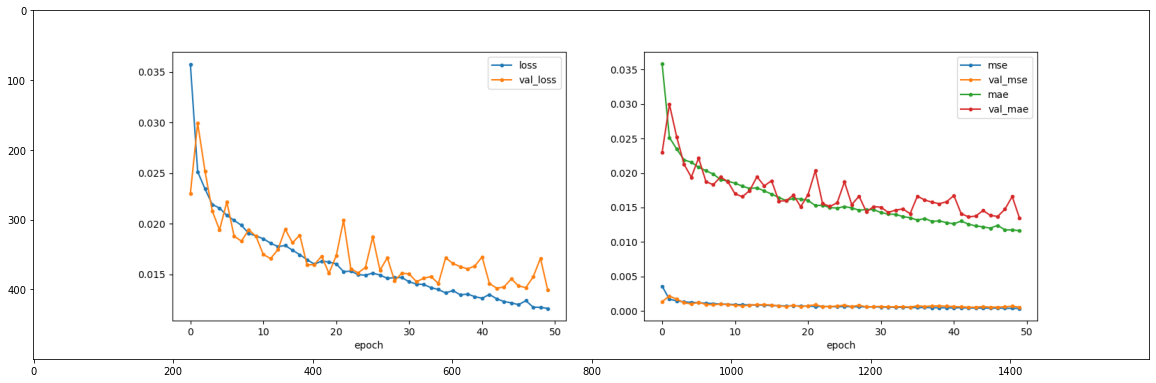

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:/jo77pihe/Registered/CARE_res/Figure_1.png')
plt.figure(figsize=(20, 10))

imgplot = plt.imshow(img)
plt.show()

In [9]:
metrics = ImageQualityMetrics()

In [6]:
files = [f for f in os.listdir(config['test_folder']) if f.endswith('.tif')]
gt_path='D:/jo77pihe/Registered/Deconved'
auto_qu_path = ''

# shape[1] -> Care Img, Autoquant Img, shape[2] -> Metrics: MSE, SSIM, MSSIM, PSNR, NIQE, SNR
res=np.zeros((len(files),2, 6))
for (i,f) in enumerate(files):
    predicted = np.float32(io.imread(os.path.join(config['test_folder'], f)))
    gt_img=np.float32(io.imread(os.path.join(gt_path, f)))
    m=metrics.compute_all(predicted,gt_img)
    res[i,0,:] = np.array([m[y] for y in m.keys()])
    

In [7]:
met_ssim = [x['ssim'] for x in result]


[{'mse': 5.693333240084453, 'ssim': -0.16021102701811069, 'msssim': -0.16021102701811069, 'psnr': 19.539033564385107, 'niqe': 0, 'brisque': 0, 'snr': -0.0032497477}, {'mse': 5.649055889254907, 'ssim': -0.19921999356252612, 'msssim': -0.19921999356252612, 'psnr': 19.572940895234208, 'niqe': 0, 'brisque': 0, 'snr': -0.22233377}, {'mse': 6.219590728901389, 'ssim': -0.09979511648819901, 'msssim': -0.09979511648819901, 'psnr': 19.155081533357244, 'niqe': 0, 'brisque': 0, 'snr': -0.12895617}, {'mse': 9.726607245050978, 'ssim': -0.1964916854746011, 'msssim': -0.1964916854746011, 'psnr': 17.213085812707153, 'niqe': 0, 'brisque': 0, 'snr': -0.82597625}, {'mse': 7.481321318122195, 'ssim': -0.13536841326640905, 'msssim': -0.13536841326640905, 'psnr': 18.352916531459627, 'niqe': 0, 'brisque': 0, 'snr': -0.3397946}, {'mse': 4.514881581283356, 'ssim': 0.3919572965137534, 'msssim': 0.3919572965137534, 'psnr': 20.546235970629695, 'niqe': 0, 'brisque': 0, 'snr': 0.649293}, {'mse': 10.74423740519187, 's

### *How similar are GT (Blind RL images) and CARE result?*

### *Examples*